In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
Y = data['Class'].to_numpy()

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [9]:
transform = preprocessing.StandardScaler()

In [10]:
X = transform.fit(X).transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [12]:
Y_test.shape

(18,)

In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']} #limited-memory BFGS algorithm

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

gridsearch_cv_lr = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gridsearch_cv_lr.fit(X_train, Y_train)

In [15]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
lr_best_score = logreg_cv.best_score_
print("accuracy :", lr_best_score)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [16]:
lr_score = logreg_cv.score(X_test, Y_test)

In [17]:
print(f"Logistic Regression - Accuracy using method score: {lr_score}")

Logistic Regression - Accuracy using method score: 0.8333333333333334


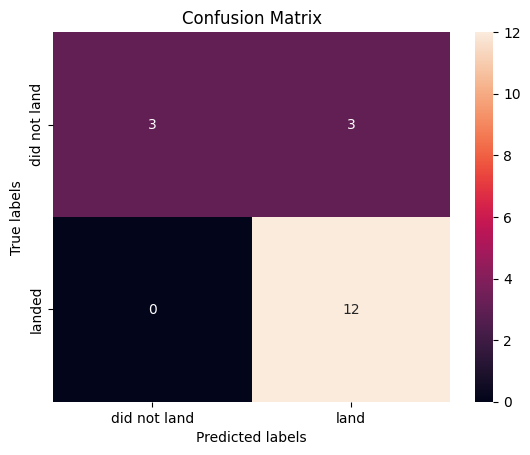

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [20]:

gridsearch_cv_svm = GridSearchCV(svm, parameters, scoring='accuracy', cv=10)
svm_cv = gridsearch_cv_svm.fit(X_train, Y_train)

In [21]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
svm_best_score = svm_cv.best_score_
print("accuracy :",svm_best_score)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [22]:
svm_score = svm_cv.score(X_test, Y_test)

In [23]:
print(f"SVM - Accuracy using method score: {svm_score}")

SVM - Accuracy using method score: 0.8333333333333334


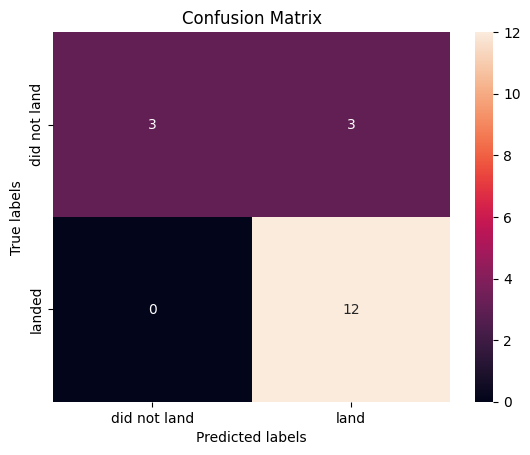

In [24]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [25]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score = tree_cv.best_score_
print("accuracy :",tree_best_score)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9035714285714287


In [29]:
tree_score = tree_cv.score(X_test, Y_test)

In [30]:
print(f"Decision Tree - Accuracy using method score: {tree_score}")

Decision Tree - Accuracy using method score: 0.7777777777777778


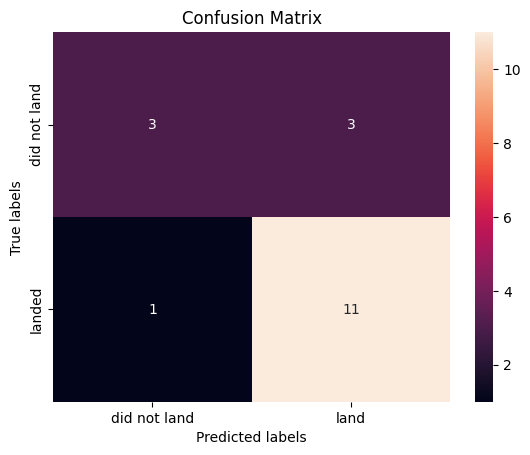

In [31]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()


In [34]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
knn_best_score = knn_cv.best_score_
print("accuracy :",knn_best_score)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [35]:
knn_score = knn_cv.score(X_test, Y_test)

In [36]:
print(f"KNN - Accuracy using method score: {knn_score}")

KNN - Accuracy using method score: 0.8333333333333334


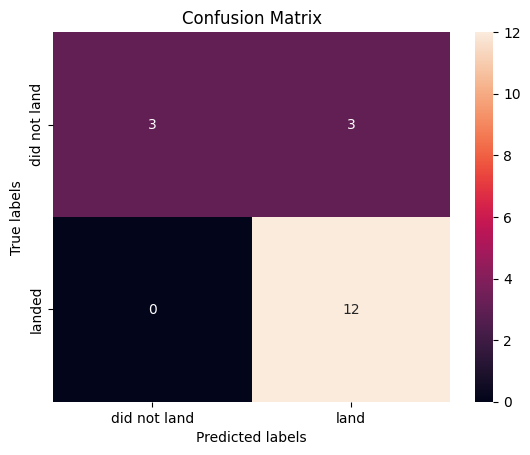

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
algorithms = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbours']

scores = [lr_score, svm_score, tree_score, knn_score]

best_scores = [lr_best_score, svm_best_score, tree_best_score, knn_best_score]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']

In [39]:
df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)

In [40]:
df

,Algorithm,Accuracy Score,Best Score
0,Logistic Regression,0.833333,0.846429
1,Support Vector Machine,0.833333,0.848214
2,Decision Tree,0.777778,0.903571
3,K Nearest Neighbours,0.833333,0.876786


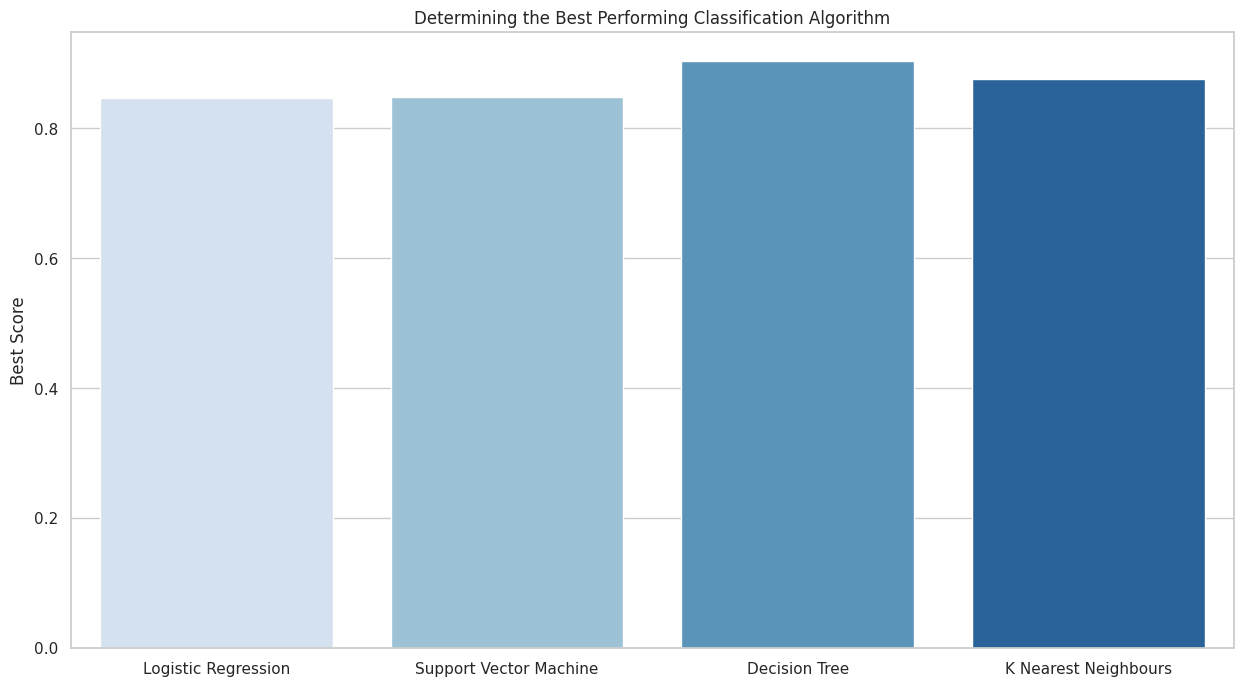

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Best Score")
plt.show()

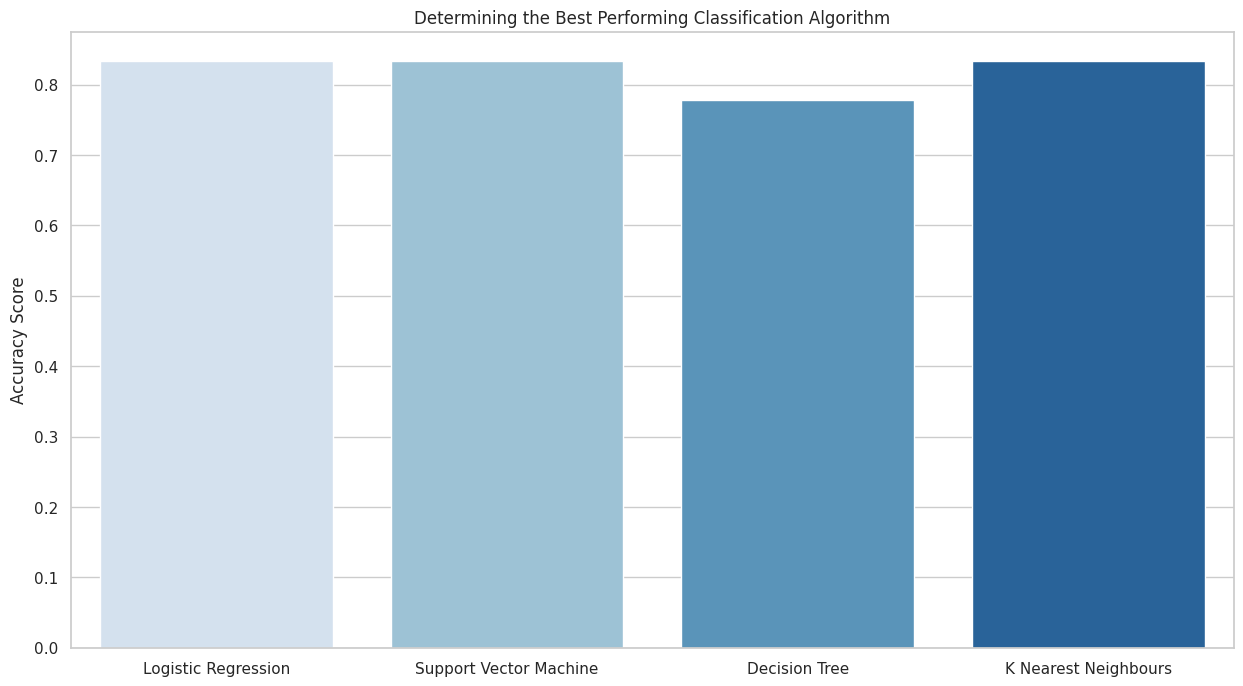

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.show()